In [2]:
%matplotlib inline

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [11]:
np.set_printoptions(precision=2)
pr = pd.read_csv('combnNA.csv') # msi 0 = low, 1 = high

colname=list(pr)

#a= colname[4:1088]

a=["STAT1", "PSME1"]
#a=["STAT1", "ELANE",  "TAP1",  "ANP32E", "LMNA","LCP1", "PTPN6", "GNAI2", "PKM","TYMP", "PRDX5","HSPH1","PFKP", "WARS", 
#          "SLC25A13", "PSME1"]
b=colname[-1]
X = pr[a]

y = pr[b]
#y= pd.get_dummies(y)
#y=y.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=41)
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values



In [12]:
pr.head()

,Unnamed: 0,X,train_cli.gender,train_cli.msi,A1BG,A2M,AARS,ABCE1,ABCF1,ABHD11,...,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZC3H15,ZC3HAV1,ZYX,result.mismatch,msi
0,1,training_1,0,Lo,2.919688,5.737663,4.791964,4.354417,3.118047,3.772443,...,5.192265,3.821649,4.017592,4.665611,6.300753,1.630672,2.915539,3.834986,0,0
1,2,training_2,0,Lo,3.753851,5.752416,4.034208,4.472278,2.318826,4.505986,...,5.062740,3.819668,3.993814,4.389870,6.139485,3.392088,2.967906,4.156957,1,1
2,3,training_3,1,Lo,3.513302,5.601927,4.460875,4.105296,2.537285,4.364739,...,5.047297,3.978143,3.574884,4.230233,5.876627,2.703586,3.298532,4.303349,0,0
3,4,training_4,0,Lo,3.588087,6.092091,4.293510,4.208789,3.028909,3.011153,...,5.332163,2.703492,3.271345,4.095585,5.595029,1.753413,1.588121,5.218254,0,0
4,5,training_5,0,Lo,3.405176,5.664237,3.681594,3.779599,3.344950,1.562058,...,4.462588,3.435482,4.177548,4.714756,6.506306,2.743619,2.440604,4.190499,0,0


In [13]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

Accuracy: 0.77 (+/- 0.03) [Decision Tree]
Accuracy: 0.64 (+/- 0.05) [K-NN]
Accuracy: 0.78 (+/- 0.02) [Bagging Tree]
Accuracy: 0.78 (+/- 0.06) [Bagging K-NN]


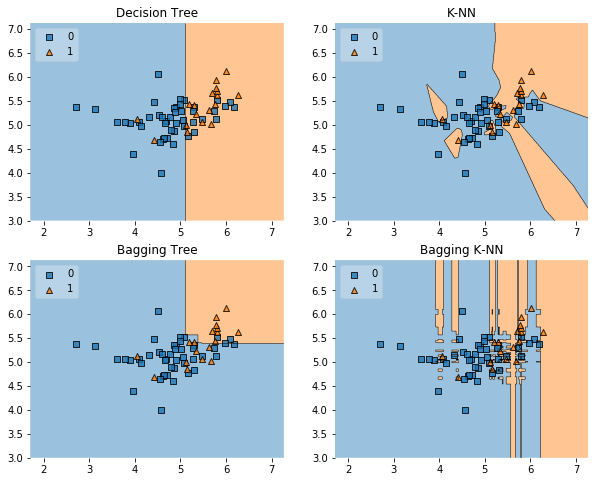

In [14]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(label)

plt.show()

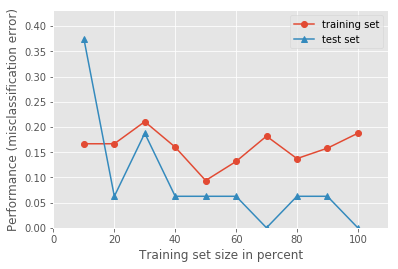

In [15]:

#plot learning curves
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [16]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

In [17]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

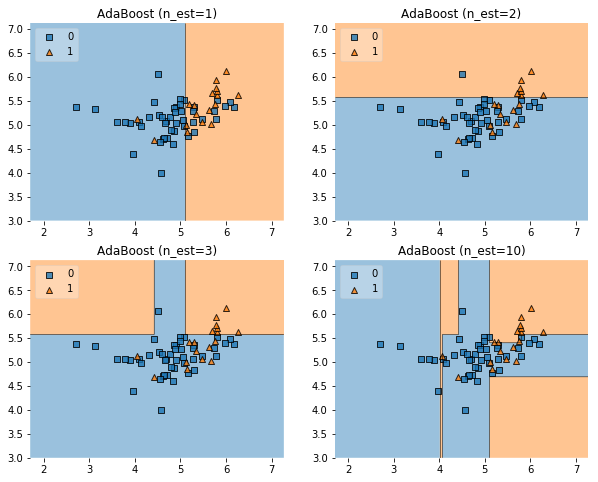

In [18]:

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)   
    boosting.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=boosting, legend=2)
    plt.title(label)

plt.show()

Accuracy: 0.78 (+/- 0.05) [['gradient Boosting']]


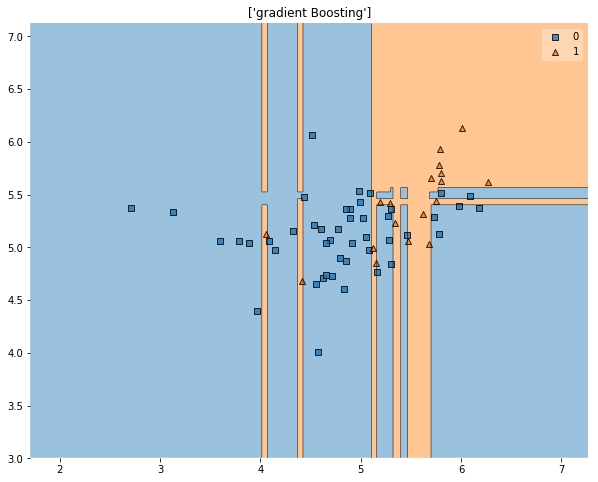

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clfgb = GradientBoostingClassifier(random_state = 5)
clfgb.fit(X_train, y_train)
label= ['gradient Boosting']
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(1,1)
grid = itertools.product([0,1],repeat=2)
#ax = plt.subplot(gs[grd[0], grd[1]])
fig = plot_decision_regions(X=X_train, y=y_train,clf=clfgb)
plt.title(label)
scores = cross_val_score(clfgb, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
plt.show()

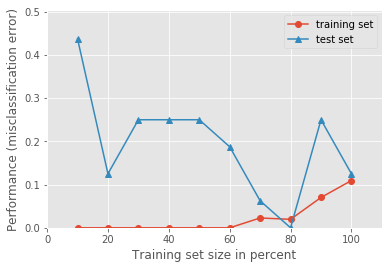

In [20]:
#plot learning curves
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)
        
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

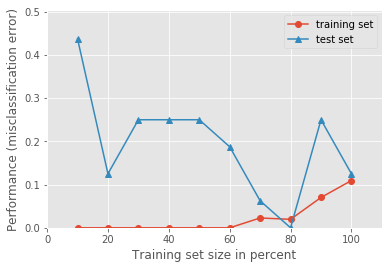

In [21]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

In [22]:
# Stacking
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [23]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

Accuracy: 0.64 (+/- 0.05) [KNN]
Accuracy: 0.80 (+/- 0.06) [Random Forest]
Accuracy: 0.77 (+/- 0.06) [Naive Bayes]
Accuracy: 0.72 (+/- 0.08) [Stacking Classifier]


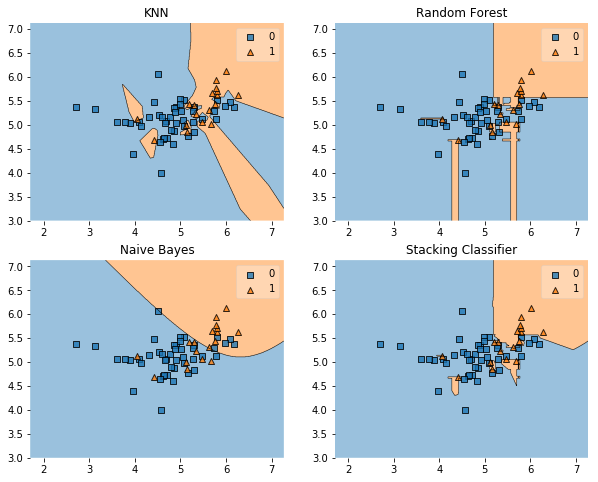

In [24]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf)
    plt.title(label)

plt.show()

In [141]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
clf_cv_mean = []
clf_cv_std = []
clf_cv_mean_test = []
clf_cv_std_test = []
for clf, label in zip(clf_list, label):
        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())  
    test_scores = cross_val_score(clf, X_test, y_test, cv=3, scoring='accuracy')
    print ("Test Accuracy: %.2f (+/- %.2f) [%s]" %(test_scores.mean(), test_scores.std(), label))
      
    clf_cv_mean_test.append(test_scores.mean())
    clf_cv_std_test.append(test_scores.std())        

clf_list = [clf1, clf2, clf3, sclf]
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
for clf, label in zip(clf_list,label):
    clf.fit(X_train, y_train)
    test_scores = cross_val_score(clf, X_test, y_test, cv=3, scoring='accuracy')
    print('Cancer dataset',label)
    print('Accuracy of  classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy: 0.80 (+/- 0.08) [KNN]
Test Accuracy: 0.81 (+/- 0.02) [KNN]
Accuracy: 0.72 (+/- 0.04) [Random Forest]
Test Accuracy: 0.76 (+/- 0.06) [Random Forest]
Accuracy: 0.81 (+/- 0.03) [Naive Bayes]
Test Accuracy: 0.64 (+/- 0.22) [Naive Bayes]
Accuracy: 0.78 (+/- 0.02) [Stacking Classifier]
Test Accuracy: 0.76 (+/- 0.06) [Stacking Classifier]
cancer dataset KNN
Accuracy of  classifier on training set: 1.00
Accuracy of classifier on test set: 0.81
cancer dataset Random Forest
Accuracy of  classifier on training set: 0.97
Accuracy of classifier on test set: 0.94
cancer dataset Naive Bayes
Accuracy of  classifier on training set: 0.95
Accuracy of classifier on test set: 0.88
cancer dataset Stacking Classifier
Accuracy of  classifier on training set: 1.00
Accuracy of classifier on test set: 0.94


In [25]:
from sklearn.metrics import confusion_matrix
lr_predicted = sclf.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print('classifier (default settings)\n', confusion)

classifier (default settings)
 [[11  1]
 [ 1  3]]


In [26]:
cross_val_score(clf2, X_train, y_train, cv=3, scoring='accuracy')

array([0.82, 0.86, 0.71])

In [30]:
# load Test dataset
np.set_printoptions(precision=2)
tpr = pd.read_csv('tcomb.csv') # msi 0 = low, 1 = high

colname=list(tpr)

a=["STAT1", "PSME1"]
#a=["STAT1", "ELANE",  "TAP1",  "ANP32E", "LMNA","LCP1", "PTPN6", "GNAI2", "PKM","TYMP", "PRDX5","HSPH1","PFKP", "WARS", 
#          "SLC25A13", "PSME1"]
b=colname[-1]
tX = tpr[a]

In [ ]:
# print predict
test_predicted = sclf.predict(tX)
print(test_predicted)
